#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 25 2022, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [1]:
#Installing a python library for displaying your plans on a map
!pip install basemap

In [2]:
#IMPORTANT: If you are unable to import Basemap below, try to restart your
#kernel (under "Kernel" in the menu above).
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,59.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


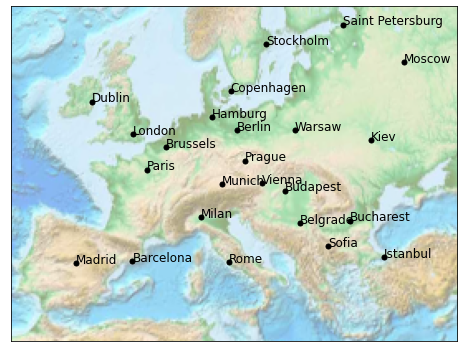

In [3]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=4E6, height=3E6, 
            lat_0=49, lon_0=13,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = m(location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [4]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig = plt.figure(figsize=(8, 8))
    m = Basemap(projection='lcc', resolution=None,
                width=4E6, height=3E6, 
                lat_0=49, lon_0=13,)
    m.etopo(scale=0.5, alpha=0.5)

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = m(current_city_coords[0], current_city_coords[1])
        #Plotting a line to the next city
        next_x, next_y = m(next_city_coords[0], next_city_coords[1])
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = m(first_city_coords[0], first_city_coords[1])
    plt.plot([next_x,first_x],[next_y,first_y])

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


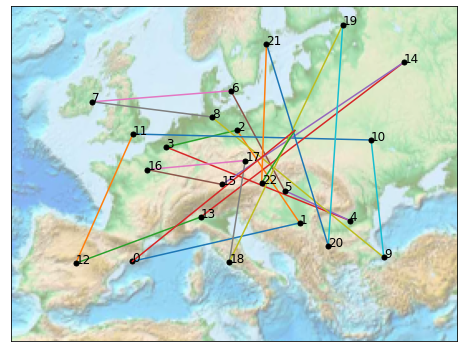

In [5]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

Number of iterations: 720
Time taken for optimal tour of length 6 to be found by exhaustive search: 0.007645130157470703
Number of iterations: 5040
Time taken for optimal tour of length 7 to be found by exhaustive search: 0.04764366149902344
Number of iterations: 40320
Time taken for optimal tour of length 8 to be found by exhaustive search: 0.407850980758667
Number of iterations: 362880
Time taken for optimal tour of length 9 to be found by exhaustive search: 4.12151575088501
Number of iterations: 3628800
Time taken for optimal tour of length 10 to be found by exhaustive search: 46.37309670448303


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total distance travelled between the ten first cities: 7486.309999999999
The optimal route was: ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin']


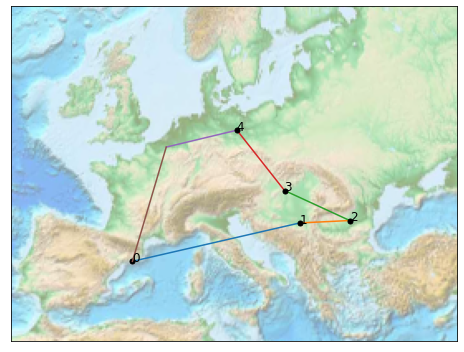

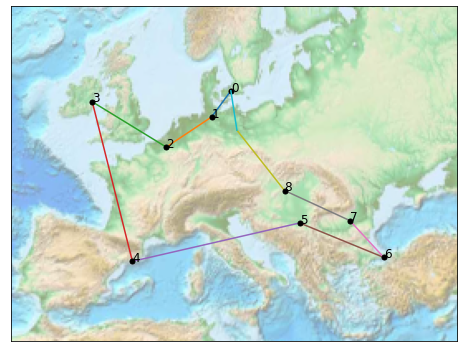

In [33]:
import csv
from itertools import permutations
import numpy as np
import time

with open("european_cities.csv", "r") as file: 
    data = list(csv.reader(file, delimiter=";"))
    cities = data[0] # name of each city
    distances = data[1:] # save all distances in 2D array

for d in distances: # convert strings to float
    for i in range(len(d)):
        d[i] = float(d[i])

distances = np.array(distances)

def fitness(tour): # Calculates total distance between cities
    s = 0
    n = len(tour)
    i = 0
    while (i<n-1):
        s += distances[tour[i], tour[i+1]] # adds up from first to second to last
        i += 1
    s += distances[tour[-1], tour[0]]
    return s

def BruteForce(P):
    P = list(P)
    best = P[0] #set some initial order to be the current best
    i = 0
    for A in P:
        i+=1
        if fitness(A) < fitness(best): # if shorter cycle found, replace best with the shorter one
            best = A
    best = [cities[i] for i in best]
    print("Number of iterations:",i)
    return best

diff_no_of_cities = [] # will contain every permutation of several cities as element, first is 6, then 7, 8 , 9, 10
solutions = []
for i in range(6, 11):
    diff_no_of_cities.append(permutations(range(i)))
    
    P = diff_no_of_cities[-1]
    start = time.time()

    solutions.append(BruteForce(P))

    end = time.time()
    print(f"Time taken for optimal tour of length {i} to be found by exhaustive search:", end-start)

plot_plan(solutions[0])
plot_plan(solutions[-1])

ten_cities_indices = [cities.index(i) for i in solutions[-1]]
ten_cities = [cities[i] for i in ten_cities_indices]
ten_cities_distance = fitness(ten_cities_indices)
print("Total distance travelled between the ten first cities:", ten_cities_distance)
print("The optimal route was:", ten_cities)

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [7]:
print("The optimal route through 10 cities was: \n", ten_cities)
# It took the program approx. 41 seconds to exhaust every route for 10 cities. Runtime has not varied a lot.

The optimal route through 10 cities was: 
 ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin']


Approximation for exhaustive search on all 24 cities: From the above runtime, it seems our runtime may grow at a rate that is exponential or potentially higher. 

Since the runtime grows so much between the run of 9 and 10 cities ($> 30$ sec), I fear the runtime may even be proportional to the factorial function, which would be awful. This I think could be the case, as the no. of permutations to check grows at a factorial rate. With 24 cities it would be 24! such orders of visiting to check, so we speculate some $10^{30}$ size type of seconds, which is monstrously large.

Attempting to run such an exhaustive search would probably either I. Kill the computer's working memory or II. Be ineffective w.r.t. (with respect to) run-time.

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

Hillclimber took: 0.16798877716064453 seconds. Way faster than Exhaustive Search on 10 first cities.
Lengths for Tours of 10 Cities: 

Mean | 25706.869000000002 
 Std Deviation | 19299.41451186682 
 Best | 9823.16 
 Worst | 16391.300000000003


Lengths for Tours of All Cities: 

Mean | 26296.895416666666 
 Std Deviation | 5381.55310167249 
 Best | 25717.490000000005 
 Worst | 35177.57


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


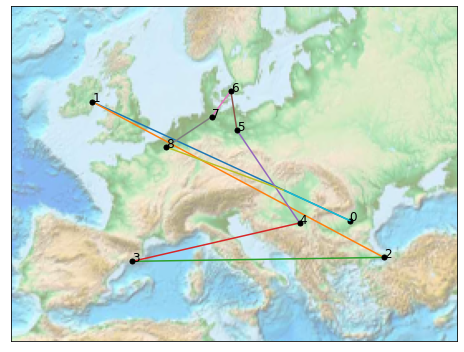

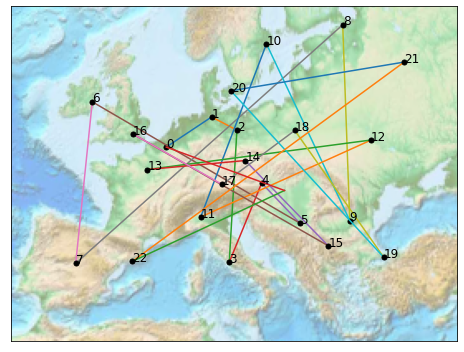

In [8]:
import csv
from itertools import permutations
from random import randint
from random import shuffle
import numpy as np
import time



def swap(L, i, j): # swap elements in L with index i,j 
    L[i], L[j] = L[j], L[i]
    return L

def rand_swap(L): # swap random elements in L
    N = len(L)
    i, j = randint(0, N-1), randint(0, N-1)
    if i == j:
        i = i-1
    return swap(L, i, j)


def HillClimber(tour, rand_seed = False):
    best = tour
    if rand_seed == True:
        shuffle(best)

    for i in range(10000):
        new = rand_swap(best)

        if fitness(new) < fitness(best):
            best = new

    best = [cities[i] for i in best]

    return best


start = time.time()
HillClimber(list(range(10)))
end = time.time()
print("Hillclimber took:", end-start, "seconds. Way faster than Exhaustive Search on 10 first cities.")

std_dev_10, std_dev_all = 0, 0
mean_10, mean_all = 0, 0
metacities = [list(range(10)), list(range(24))]

fits_10, fits_all = [], [] # use this for std deviation calculation

for i in range(20):
    cities_input_10 = [cities.index(i) for i in HillClimber(metacities[0],rand_seed=True)]
    cities_input_all = [cities.index(i) for i in HillClimber(metacities[1],rand_seed=True)]
    mean_10 += 1/10 * fitness(cities_input_10)
    mean_all += 1/24 * fitness(cities_input_all)
    fits_10.append(fitness(cities_input_10))
    fits_all.append(fitness(cities_input_all))

s10 = 0
sall = 0
for i in range(20): 
    s10 += (fits_10[i] - mean_10)**2 
    sall += (fits_all[i] - mean_all)**2

s10 = 1/9 * s10
sall = 1/23 * sall

std_dev_10 = np.sqrt(s10)
std_dev_all = np.sqrt(sall)

best_10 = min(fits_10)
worst_10 = max(fits_10)

best_all = min(fits_all)
worst_all = max(fits_all)

print("Lengths for Tours of 10 Cities: \n")
print(f"Mean | {mean_10} \n Std Deviation | {std_dev_10} \n Best | {best_10} \n Worst | {worst_10}")
print("\n")
print("Lengths for Tours of All Cities: \n")
print(f"Mean | {mean_all} \n Std Deviation | {std_dev_all} \n Best | {best_all} \n Worst | {worst_all}")


plan_10 = [cities[i] for i in cities_input_10]
plan_all = [cities[i] for i in cities_input_all]

plot_plan(plan_10)

plot_plan(plan_all)

Seeing that many paths intersect above in both 10 cities case and all cities, we do not find global optimas, as we'd expect. 

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

______Population size: 1000______
Lengths for Tours of 10 Cities: 

Mean | 25318.26 
 Std Deviation | 19019.920412989228 
 Best | 10610.100000000002 
 Worst | 15592.730000000001


Lengths for Tours of All Cities: 

Mean | 26440.84583333333 
 Std Deviation | 5292.02154312213 
 Best | 27496.26 
 Worst | 35920.17
______Population size: 10000______
Lengths for Tours of 10 Cities: 

Mean | 24025.106000000003 
 Std Deviation | 18034.06959673459 
 Best | 9053.5 
 Worst | 14738.71


Lengths for Tours of All Cities: 

Mean | 26061.414583333335 
 Std Deviation | 5384.518324338197 
 Best | 25783.13 
 Worst | 35350.560000000005
______Population size: 100000______
Lengths for Tours of 10 Cities: 

Mean | 25035.125 
 Std Deviation | 18783.583360335044 
 Best | 9673.349999999999 
 Worst | 15101.93


Lengths for Tours of All Cities: 

Mean | 26691.630416666667 
 Std Deviation | 5493.260061437324 
 Best | 27165.6 
 Worst | 34862.130000000005
Sample time taken for G.A. for 10 and all 24 cities respectiv

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


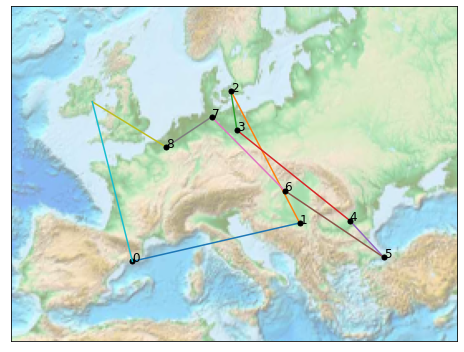

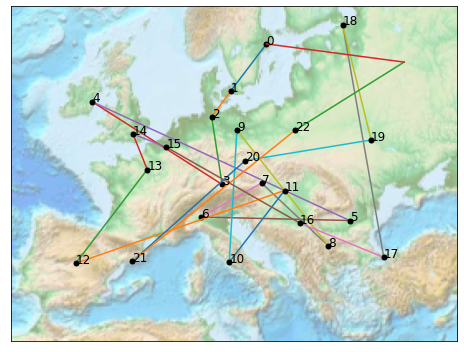

In [57]:
import csv
from itertools import permutations
from math import factorial
from random import randint
from random import shuffle
import numpy as np
import time

with open("european_cities.csv", "r") as file: 
    data = list(csv.reader(file, delimiter=";"))
    cities = data[0] # name of each city
    distances = data[1:] # save all distances in 2x2 matrix

for d in distances: # convert strings to float
    for i in range(len(d)):
        d[i] = float(d[i])

distances = np.array(distances)

def fitness(tour): # Calculates total distance between cities
    s = 0
    n = len(tour)
    i = 0
    while (i<n-1):
        s += distances[tour[i], tour[i+1]] # adds up from first to second to last
        i += 1
    s += distances[tour[-1], tour[0]]

    return s


def swap(L, i, j): # swap elements in L with index i,j 
    L[i], L[j] = L[j], L[i]

    return L

def rand_swap(L): # swap random elements in L
    N = len(L)
    i, j = randint(0, N-1), randint(0, N-1)
    if i == j:
        i = i-1
    
    return swap(L, i, j)

def parent_selection(population): # select many fit individuals, some not so fit as well
    parents = population[:501]
    
    return parents

def pmx(p1, p2, start, stop): # crossover operator 
    child = [None] * len(p1)
    child[start:stop] = p1[start:stop]

    for i, x in enumerate(p2[start:stop]):
        i += start
        if x not in child:
            while child[i] != None:
                i = p2.index(p1[i])
            child[i] = x
    
    for i, x in enumerate(child):
        if x == None: 
            child[i] = p2[i]
    
    return child
    
def pmx_pair(a, b): 
    h = len(a)//2
    start = randint(0, len(a) - h + 1)
    stop = start + h

    return pmx(a,b,start,stop) , pmx(b,a,start,stop)


def gen_algorithm(n, k): # n length of tour, k pop size
    
    # Initialisation
    elite = [] # keeps 10 best solutions, sorted max-to-min
    population = [list(range(n))]
    while len(population) <= k:
        i = population[-1]
        shuffle(i) # if n high enough, there will be plenty of different possible outputs here, giving different runned results
        population.append(i)

    population.sort(key=fitness, reverse=True)
    # Main Loop of EA
    for k in range(10):
        parents = parent_selection(population)
        mutators = parents[:len(population)//2 - 5]
        crossovers = parents[len(population)//2 - 5:]
        survivors = []

        for i in range(len(mutators)): 
            survivors.append(rand_swap(mutators[i]))
        
        crossover_pairs = [crossovers[i:i+2] for i in range(0, len(crossovers)-1, 2)]

        for pair in crossover_pairs:
            child1, child2 = pmx_pair(pair[0], pair[1])
            survivors.append(child1)
            survivors.append(child2)

        population = population + survivors
        population.sort(key=fitness, reverse=True)
        population = population[:10**3]
        elite = population[:10]
        best = max(elite, key=fitness)
        best = [cities[i] for i in best]
    return best



pop_sizes = [10**3, 10**4, 10**5]

for i in pop_sizes:
    print(f"______Population size: {i}______")
    
    best_of_best_10 = []
    best_of_best_all = []
    std_dev_10, std_dev_all = 0, 0
    mean_10, mean_all = 0, 0

    fits_10, fits_all = [], [] # use this for std deviation calculation

    for k in range(20):
        start = time.time()
        sol10 = gen_algorithm(10, i)
        end = time.time()
        t10 = end - start
        inputs_10 = [cities.index(i) for i in sol10]
        
        start = time.time()
        solall = gen_algorithm(24, i)
        end = time.time()
        t_all = end - start
        inputs_all= [cities.index(i) for i in solall]
        
        mean_10 += 1/10 * fitness(inputs_10)
        mean_all += 1/24 * fitness(inputs_all)
        
        fits_10.append(fitness(inputs_10))
        fits_all.append(fitness(inputs_all))
        
        best_of_best_10.append(inputs_10)
        best_of_best_all.append(inputs_all)
    
    s10 = 0
    sall = 0
    for i in range(20): 
        s10 += (fits_10[i] - mean_10)**2 
        sall += (fits_all[i] - mean_all)**2

    s10 = 1/9 * s10
    sall = 1/23 * sall

    std_dev_10 = np.sqrt(s10)
    std_dev_all = np.sqrt(sall)

    best_10 = min(fits_10)
    worst_10 = max(fits_10)

    best_all = min(fits_all)
    worst_all = max(fits_all)

    print("Lengths for Tours of 10 Cities: \n")
    print(f"Mean | {mean_10} \n Std Deviation | {std_dev_10} \n Best | {best_10} \n Worst | {worst_10}")
    print("\n")
    print("Lengths for Tours of All Cities: \n")
    print(f"Mean | {mean_all} \n Std Deviation | {std_dev_all} \n Best | {best_all} \n Worst | {worst_all}")
    

print("Sample time taken for G.A. for 10 and all 24 cities respectively:", t10, t_all)
 
    
plot_input_10 = min(best_of_best_10, key=fitness)
plot_input_all = min(best_of_best_all, key=fitness)

plot_input_10 = [cities[i] for i in plot_input_10]
plot_input_all = [cities[i] for i in plot_input_all]

plot_plan(plot_input_10)
plot_plan(plot_input_all)

**Some Assumptions and notes**
We use $10$ repetitions in the main-EA as a result of trial and error, the run-time for the larger population sizes (at the time, at least) seemed to drag on for too long, especially with $24$ cities in the tour. Even got memory-error by using a too high number of loops. 

We shuffled the list of $0, \cdots, n$ elements (permutation) to generate the population with some randomness.
In hindsight, the selection procedures seem to produce a form of pre-mature convergence due to the solutions produced by the G.A. containing several intersections in the plots (tour contains crossings).

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

**Runtimes:** Using $10$ cities we have run-times running up to about $1.9$ seconds, and run-times at about $4$ seconds for all $24$ cities.

**Found shortest tour of 10 cities? Did GA come close?:** Looking to the above output for the 10 cities, we found that the best one was a tour of length $11389.63$ at population size $10^5$ and $9863.94$ at population size $10^4$. It might be in this case that generating the population by shuffling causes *too much* randomness and possibly generates a flatter fitness landscape. The result from *Exhaustive Search* was $7486.309999999999$ which was much shorter. Whether the G.A. came close is a little bit subjective, but seeing the plot above makes it seem like it came quite close.

**How many tours inspected?** I think that would be something along the lines of the population size $k$ times the number of runs, $20$ . Possibly around $2*10^6$ at $k = 10^5$. I suspect I am wrong about this.

**Comments:** It seems the genetic algorithm at some 20-runs-iterations find better solutions than other times. I think this has to do with the random nature of generating the population by shuffling some seed. It also seems strange that the population size $10^5$ can produce *worse* tours than those of $10^4$. Honestly, I cannot comprehend why that is the case, but I suspect that it might have to do with how I've set up mutation/crossover operators and that they select in some peculiar way.

Also, the whole process of learning how an E.A. can be applied to TSP was very educational, and I feel like I've benefitted greatly.

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [11]:
# Implement algorithm here